### Wstęp do Uczenia Maszynowego 
##### Laboratorium 10

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

### 1. Selekcja zmiennych

### Zadanie 1
----
Przyjrzyj się dokumentacji funkcji `SelectFromModel()`. Wczytaj zbiór danych `SAheart.data`, podziel na zbiór treningowy i testowy w stosunku 3:2.

a) Przygotuj `pipeline`, który przygotuje model regresji logistycznej.

b) Dodaj selekcję zmiennych z wykorzystaniem `SelectFromModel()` w utworzonym `pipeline` w punkcie a). Do funkcji `SelectFromModel()` wykorzystaj model regresji logistycznej a do modelowania wykorzystaj drzewo decyzyjne.

c) Przygotuj kolejny `pipeline`, który do wyboru zmiennych zamiast funkcji `SelectFromModel()` wykorzysta funkcję `SequentialFeatureSelector()`.

In [67]:
df = pd.read_csv("SAheart.data")

### 2. PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
wine_data = datasets.load_wine(as_frame=True)
df = wine_data.data

In [2]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(scaled_df)

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [4]:
print(pca.components_)

[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]


In [5]:
print(sum(pca.explained_variance_ratio_))

0.6652996889318527


In [8]:
var_ratio = []
for num in np.arange(14):
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

<Axes: >

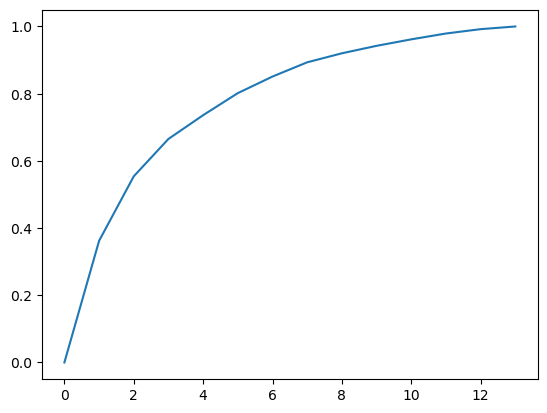

In [9]:
import seaborn as sns

sns.lineplot(x = range(scaled_df.shape[1] + 1), y = var_ratio)

### Zadanie 2
----
Wczytaj zbiór danych `pima.csv`.

a) Podziel zbiór na treningowy i testowy w proporcji 4:1.

b) Na zbiorze treningowym wyznacz komponenty uzyskane metodą PCA. Sporządź wykres, który ukazuje jaki procent wariancji jest wyjaśniany przez kolejne komponenty.

c) Dopasuj model regresji logistycznej dla danych treningowych pełnych, dla danych po PCA, dla 5 pierwszych komponentów po PCA, dla 2 pierwszych komponentów po PCA.

d) Policz dokładność na zbiorze testowym dla każego modelu z punktu c).

e) Przygotuj `pipeline` ze wszystkimi krokami dla modelu regresji logistycznej na danych po PCA i policz dokładność na zbiorze testowym.

*Wyniki punktu e) powinny być takie same jak dla drugiego modelu z punktu c)*

In [30]:
pima = pd.read_csv("pima.csv")